# Real Life Analysis

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


cols = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv")
data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])


<ipython-input-35-9e380d3d45fc>:13: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",


In [ ]:
empty = (data.isna().sum() == data.shape[0])
data = data[empty.index[~empty]]  # 移除空列
dataV2 = data[data.REMOVE_case == 'No'].copy()  # 移除推薦刪除的行
dataV2_cohort = dataV2[dataV2.SURVEY_cohort_participant].copy()  # 篩選群組參與者
dataV2_cohortV2 = dataV2_cohort[dataV2_cohort.SURVEY_collection_year != 2023].copy()  # 排除2023年數據
real_life_final_data = dataV2_cohortV2[['CONNECTION_preference_time_friends_grouped', 'CONNECTION_preference_time_coworkers_classmates_grouped', 'CONNECTION_preference_time_family_grouped', 'WELLNESS_self_rated_mental_health']].copy()

In [ ]:
real_life_final_data['WELLNESS_self_rated_mental_health'] = real_life_final_data['WELLNESS_self_rated_mental_health'].map(
    {"Excellent": 5.0, "Very good": 4.0, "Good": 3.0, "Fair": 2, "Poor": 1})

In [ ]:
real_life_cleaned_final_data = real_life_final_data.dropna()
real_life_cleaned_final_data

,CONNECTION_preference_time_friends_grouped,CONNECTION_preference_time_coworkers_classmates_grouped,CONNECTION_preference_time_family_grouped,WELLNESS_self_rated_mental_health
21,5 or more hours,No time,1 to 4 hours,4.0
71,5 or more hours,Less than 1 hour,1 to 4 hours,5.0
77,1 to 4 hours,No time,5 or more hours,3.0
78,5 or more hours,No time,1 to 4 hours,4.0
79,1 to 4 hours,1 to 4 hours,1 to 4 hours,2.0
...,...,...,...,...
11379,1 to 4 hours,1 to 4 hours,No time,2.0
11380,1 to 4 hours,1 to 4 hours,1 to 4 hours,2.0
11412,5 or more hours,No time,5 or more hours,3.0
11428,1 to 4 hours,1 to 4 hours,1 to 4 hours,1.0


Mental Health Rating Counts:
WELLNESS_self_rated_mental_health
1.0    118
2.0    225
3.0    239
4.0    156
5.0     72
Name: count, dtype: int64


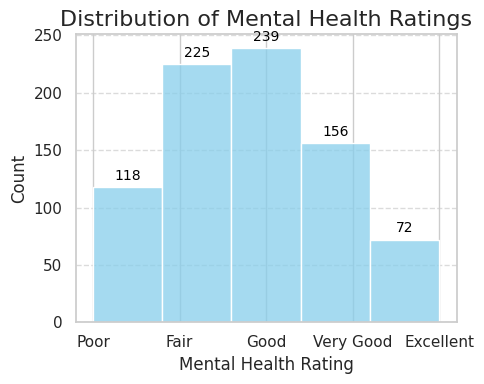

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 打印不同值的数量
value_counts = real_life_final_data['WELLNESS_self_rated_mental_health'].value_counts().sort_index()
print("Mental Health Rating Counts:")
print(value_counts)

# 绘制直方图
plt.figure(figsize=(5, 4))
ax = sns.histplot(
    data=real_life_final_data,
    x='WELLNESS_self_rated_mental_health',
    bins=5,
    kde=False,
    color="skyblue"
)

# 添加标签到每个条形图上
for bar, count in zip(ax.patches, value_counts):
    # 获取条形的中心位置和高度
    bar_center = bar.get_x() + bar.get_width() / 2
    bar_height = bar.get_height()
    # 在条形图顶部添加文本标签
    ax.annotate(
        text=str(count),
        xy=(bar_center, bar_height),
        xytext=(0, 3),  # 3 points above the bar
        textcoords="offset points",
        ha='center', va='bottom', fontsize=10, color="black"
    )

plt.title("Distribution of Mental Health Ratings", fontsize=16)
plt.xlabel("Mental Health Rating", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=[1, 2, 3, 4, 5], labels=["Poor", "Fair", "Good", "Very Good", "Excellent"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
real_life_binary_cleaned_final_data = real_life_cleaned_final_data.copy()

for col in real_life_binary_cleaned_final_data.iloc[:, :3]:
  real_life_binary_cleaned_final_data[col] = real_life_binary_cleaned_final_data[col].map(
    {"5 or more hours": 1, "Less than 1 hour": 0, "1 to 4 hours": 1, "No time": 0})

In [ ]:
real_life_binary_cleaned_final_data

,CONNECTION_preference_time_friends_grouped,CONNECTION_preference_time_coworkers_classmates_grouped,CONNECTION_preference_time_family_grouped,WELLNESS_self_rated_mental_health
21,1,0,1,4.0
71,1,0,1,5.0
77,1,0,1,3.0
78,1,0,1,4.0
79,1,1,1,2.0
...,...,...,...,...
11379,1,1,0,2.0
11380,1,1,1,2.0
11412,1,0,1,3.0
11428,1,1,1,1.0


In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# Make a copy of the original DataFrame
data_copy = real_life_cleaned_final_data.copy()

# Ensure the target variable is numeric
# If it's categorical, it should be encoded or converted to numeric in this process.

# Define the OLS model specification
linear_model_specification = '''
    WELLNESS_self_rated_mental_health ~ I(CONNECTION_preference_time_friends_grouped)
                                        + I(CONNECTION_preference_time_coworkers_classmates_grouped)
                                        + I(CONNECTION_preference_time_family_grouped)
'''

# Fit the model using statsmodels
model = smf.ols(linear_model_specification, real_life_binary_cleaned_final_data).fit()

# Print the model summary
print("Model Summary:")
print(model.summary())


Model Summary:
                                    OLS Regression Results                                   
Dep. Variable:     WELLNESS_self_rated_mental_health   R-squared:                       0.009
Model:                                           OLS   Adj. R-squared:                  0.005
Method:                                Least Squares   F-statistic:                     2.282
Date:                               Sun, 01 Dec 2024   Prob (F-statistic):             0.0779
Time:                                       18:34:26   Log-Likelihood:                -1222.1
No. Observations:                                775   AIC:                             2452.
Df Residuals:                                    771   BIC:                             2471.
Df Model:                                          3                                         
Covariance Type:                           nonrobust                                         
                                             

<ipython-input-43-425e645c327f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=binary_data, x=var, ax=axes[i], palette="coolwarm")
<ipython-input-43-425e645c327f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=binary_data, x=var, ax=axes[i], palette="coolwarm")
<ipython-input-43-425e645c327f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=binary_data, x=var, ax=axes[i], palette="coolwarm")


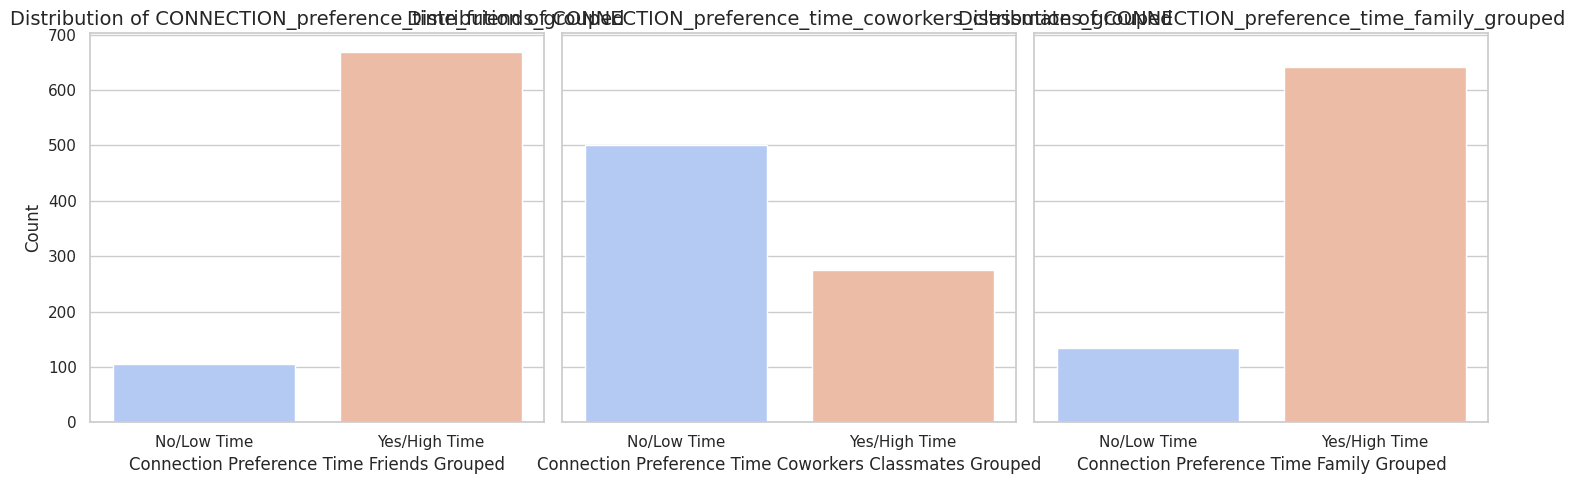

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

binary_data = real_life_binary_cleaned_final_data

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

variables = [
    'CONNECTION_preference_time_friends_grouped',
    'CONNECTION_preference_time_coworkers_classmates_grouped',
    'CONNECTION_preference_time_family_grouped'
]

for i, var in enumerate(variables):
    sns.countplot(data=binary_data, x=var, ax=axes[i], palette="coolwarm")
    axes[i].set_title(f"Distribution of {var}", fontsize=14)
    axes[i].set_xlabel(var.replace('_', ' ').title(), fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['No/Low Time', 'Yes/High Time'])

plt.tight_layout()
plt.show()


<ipython-input-44-6ff007b859e6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-44-6ff007b859e6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-44-6ff007b859e6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


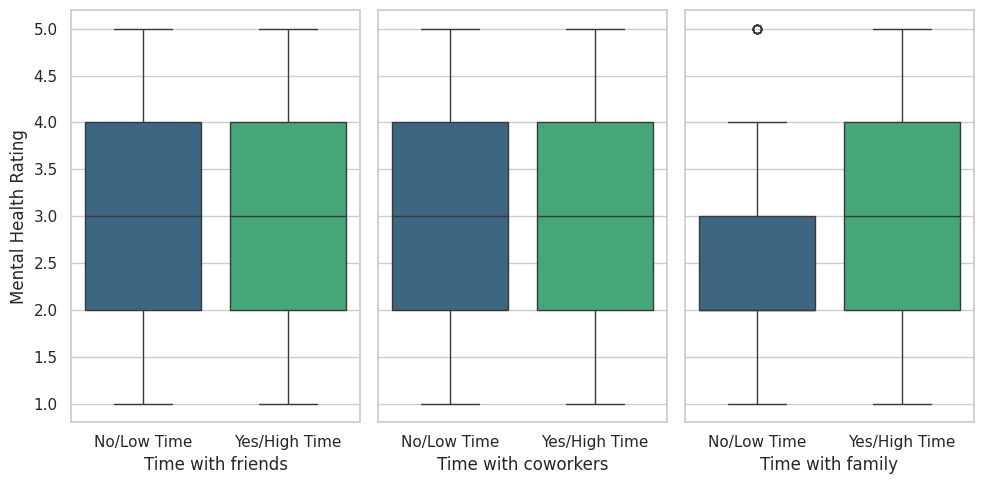

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True)

for i, var in enumerate(variables):
    sns.boxplot(
        data=binary_data,
        x=var,
        y='WELLNESS_self_rated_mental_health',
        ax=axes[i],
        palette="viridis"
    )
    # axes[i].set_title(f"{var}", fontsize=14)
    axes[i].set_ylabel("Mental Health Rating", fontsize=12)
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['No/Low Time', 'Yes/High Time'])

axes[0].set_xlabel('Time with friends', fontsize=12)
axes[1].set_xlabel('Time with coworkers', fontsize=12)
axes[2].set_xlabel('Time with family', fontsize=12)

plt.tight_layout()
plt.show()


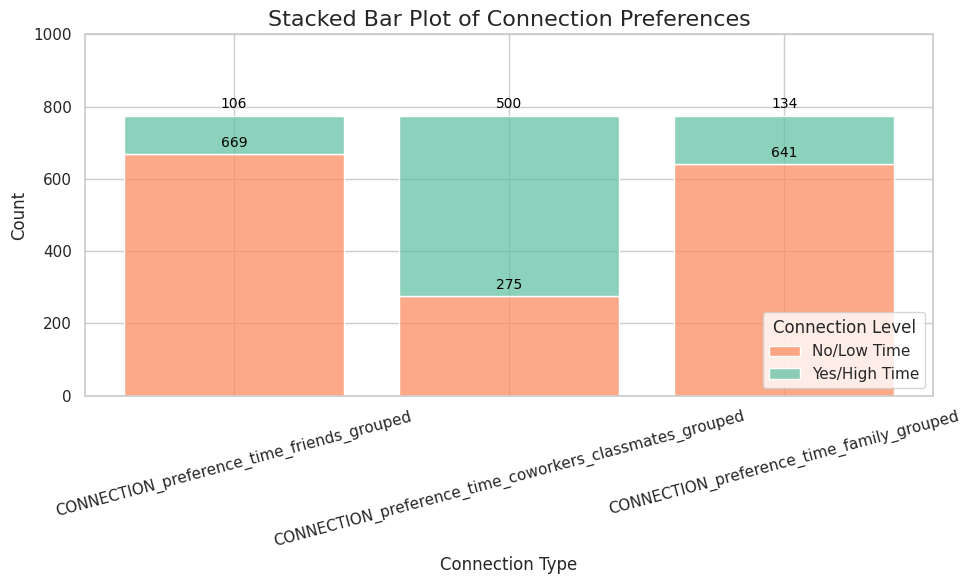

In [ ]:
# Melt the data
binary_data_melted = binary_data.melt(
    id_vars=['WELLNESS_self_rated_mental_health'],
    value_vars=variables,
    var_name='Connection_Type',
    value_name='Connection_Level'
)

plt.figure(figsize=(10, 6))
ax = sns.histplot(
    data=binary_data_melted,
    x='Connection_Type',
    hue='Connection_Level',
    multiple='stack',
    palette="Set2",
    shrink=0.8
)

# Add labels to each segment of the stacked bars
for bar in ax.patches:
    # Get the bar's coordinates and height
    bar_x = bar.get_x() + bar.get_width() / 2
    bar_height = bar.get_height()
    if bar_height > 0:  # Only label bars with height > 0
        ax.annotate(
            text=f'{int(bar_height)}',
            xy=(bar_x, bar.get_y() + bar_height),
            xytext=(0, 3),  # Offset the label slightly above the bar
            textcoords="offset points",
            ha='center', va='bottom', fontsize=10, color="black"
        )

# Adjust the y-axis limit
ax.set_ylim(0, 1000)

plt.title("Stacked Bar Plot of Connection Preferences", fontsize=16)
plt.xlabel("Connection Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=15)
plt.legend(title="Connection Level", labels=["No/Low Time", "Yes/High Time"], loc='lower right')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


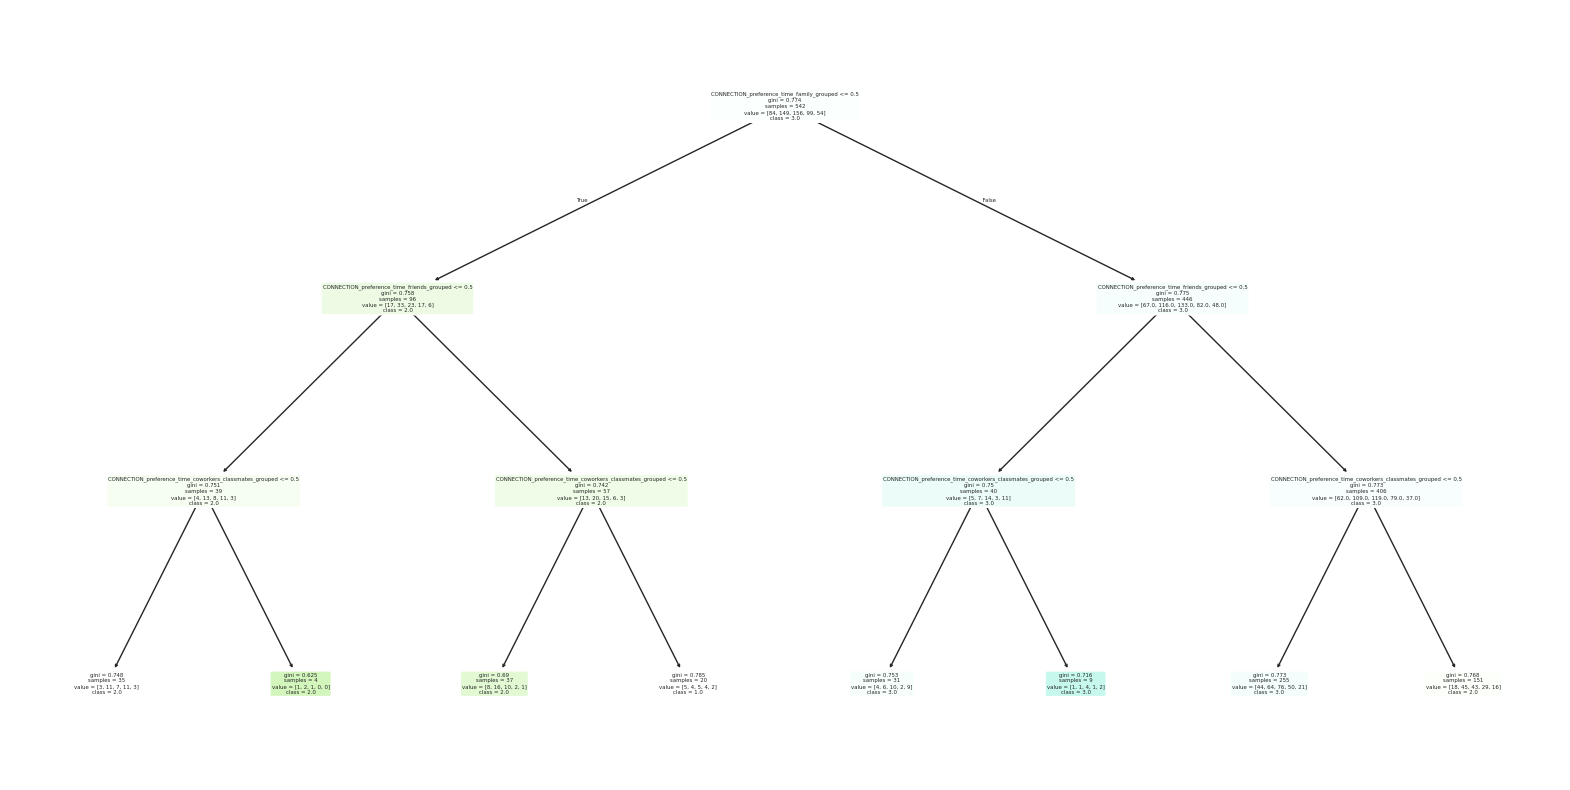

Confusion Matrix:
[[ 1 18 10  0  0]
 [ 5 28 33  0  0]
 [ 1 37 32  0  0]
 [ 2 15 34  0  0]
 [ 0  8  9  0  0]]

Classification Report:
              precision    recall  f1-score   support

         1.0       0.11      0.03      0.05        29
         2.0       0.26      0.42      0.33        66
         3.0       0.27      0.46      0.34        70
         4.0       0.00      0.00      0.00        51
         5.0       0.00      0.00      0.00        17

    accuracy                           0.26       233
   macro avg       0.13      0.18      0.14       233
weighted avg       0.17      0.26      0.20       233



In [ ]:
# 3. 分割數據：特徵和目標變數
X = real_life_binary_cleaned_final_data[['CONNECTION_preference_time_friends_grouped',
                                          'CONNECTION_preference_time_coworkers_classmates_grouped',
                                          'CONNECTION_preference_time_family_grouped']]
y = real_life_binary_cleaned_final_data['WELLNESS_self_rated_mental_health']

# 4. 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. 建立決策樹分類器模型
from sklearn.tree import DecisionTreeClassifier

# 創建一個決策樹分類器對象
dt_model = DecisionTreeClassifier(random_state=42)

# 6. 訓練模型
dt_model.fit(X_train, y_train)

# 7. 預測測試集結果
y_pred = dt_model.predict(X_test)

# 8. 評估模型性能
# 混淆矩陣
cm = confusion_matrix(y_test, y_pred)

# 顯示分類報告
report = classification_report(y_test, y_pred)

# 9. 可視化決策樹
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=[str(i) for i in dt_model.classes_], rounded=True)
plt.show()

# 顯示混淆矩陣和分類報告
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


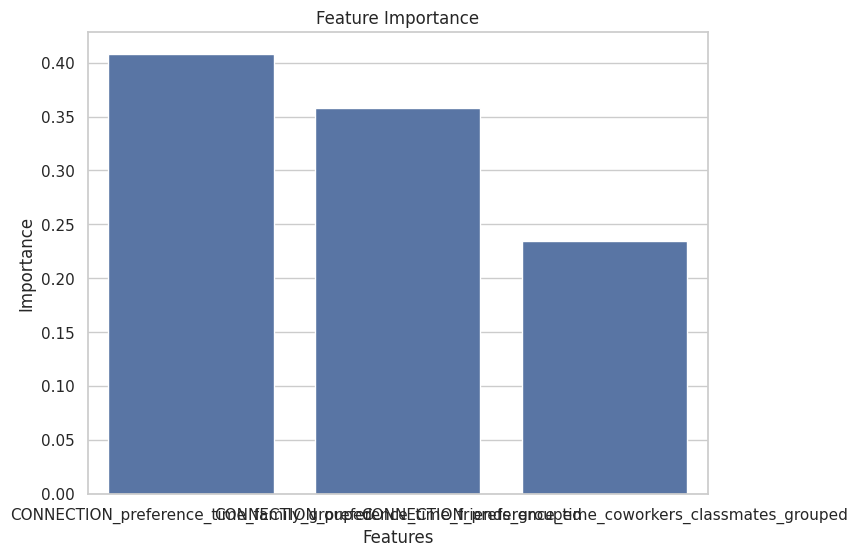

Confusion Matrix:
[[ 0 18 11  0  0]
 [ 0 28 38  0  0]
 [ 0 37 33  0  0]
 [ 0 15 36  0  0]
 [ 0  8  9  0  0]]

Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        29
         2.0       0.26      0.42      0.33        66
         3.0       0.26      0.47      0.34        70
         4.0       0.00      0.00      0.00        51
         5.0       0.00      0.00      0.00        17

    accuracy                           0.26       233
   macro avg       0.10      0.18      0.13       233
weighted avg       0.15      0.26      0.19       233



In [ ]:
# 3. 分割數據：特徵和目標變數
X = real_life_binary_cleaned_final_data[['CONNECTION_preference_time_friends_grouped',
                                          'CONNECTION_preference_time_coworkers_classmates_grouped',
                                          'CONNECTION_preference_time_family_grouped']]
y = real_life_binary_cleaned_final_data['WELLNESS_self_rated_mental_health']

# 4. 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. 建立隨機森林模型
from sklearn.ensemble import RandomForestClassifier

# 創建隨機森林分類器對象
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 6. 訓練模型
rf_model.fit(X_train, y_train)

# 7. 預測測試集結果
y_pred = rf_model.predict(X_test)

# 8. 評估模型性能
# 混淆矩陣
cm = confusion_matrix(y_test, y_pred)

# 顯示分類報告
report = classification_report(y_test, y_pred)

# 9. 顯示隨機森林特徵重要性
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame(importances, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

# 10. 可視化隨機森林特徵重要性
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance.index, y=feature_importance['Importance'])
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# 顯示混淆矩陣和分類報告
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)


In [ ]:
# 9. Display feature importances of the trained Random Forest model
importances = rf_model.feature_importances_

# Create a DataFrame for better readability
feature_importance = pd.DataFrame(importances, index=X.columns, columns=['Importance'])

# Sort the features by importance in descending order
feature_importance_sorted = feature_importance.sort_values('Importance', ascending=False)

# Print out the feature importances
print("Feature Importances from Random Forest:")
print(feature_importance_sorted)


Feature Importances from Random Forest:
                                                    Importance
CONNECTION_preference_time_family_grouped             0.407963
CONNECTION_preference_time_friends_grouped            0.357627
CONNECTION_preference_time_coworkers_classmates...    0.234410


<ipython-input-55-2ac21868bc8d>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[sorted_idx], y=new_feature_names, palette='viridis')


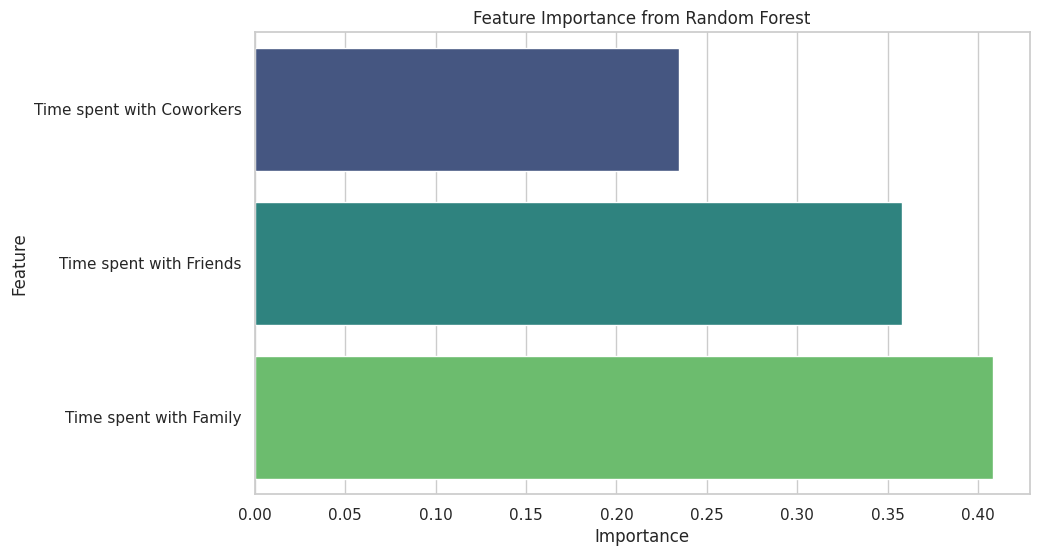

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 9. Plot the feature importances
plt.figure(figsize=(10, 6))

# Sort the features by importance
sorted_idx = importances.argsort()

# Mapping old column names to new ones
feature_names_map = {
    'CONNECTION_preference_time_friends_grouped': 'Time spent with Friends',
    'CONNECTION_preference_time_coworkers_classmates_grouped': 'Time spent with Coworkers',
    'CONNECTION_preference_time_family_grouped': 'Time spent with Family'
}

# Replace the feature names with the new ones
new_feature_names = [feature_names_map[col] for col in X.columns[sorted_idx]]

# Create a horizontal bar plot
sns.barplot(x=importances[sorted_idx], y=new_feature_names, palette='viridis')

# Add labels and title
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Display the plot
plt.show()


<ipython-input-54-7ed24f560c41>:11: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",


Accuracy: 0.26180257510729615
Confusion Matrix:
 [[ 1 18 10  0  0]
 [ 5 28 33  0  0]
 [ 1 37 32  0  0]
 [ 2 15 34  0  0]
 [ 0  8  9  0  0]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.11      0.03      0.05        29
         2.0       0.26      0.42      0.33        66
         3.0       0.27      0.46      0.34        70
         4.0       0.00      0.00      0.00        51
         5.0       0.00      0.00      0.00        17

    accuracy                           0.26       233
   macro avg       0.13      0.18      0.14       233
weighted avg       0.17      0.26      0.20       233



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


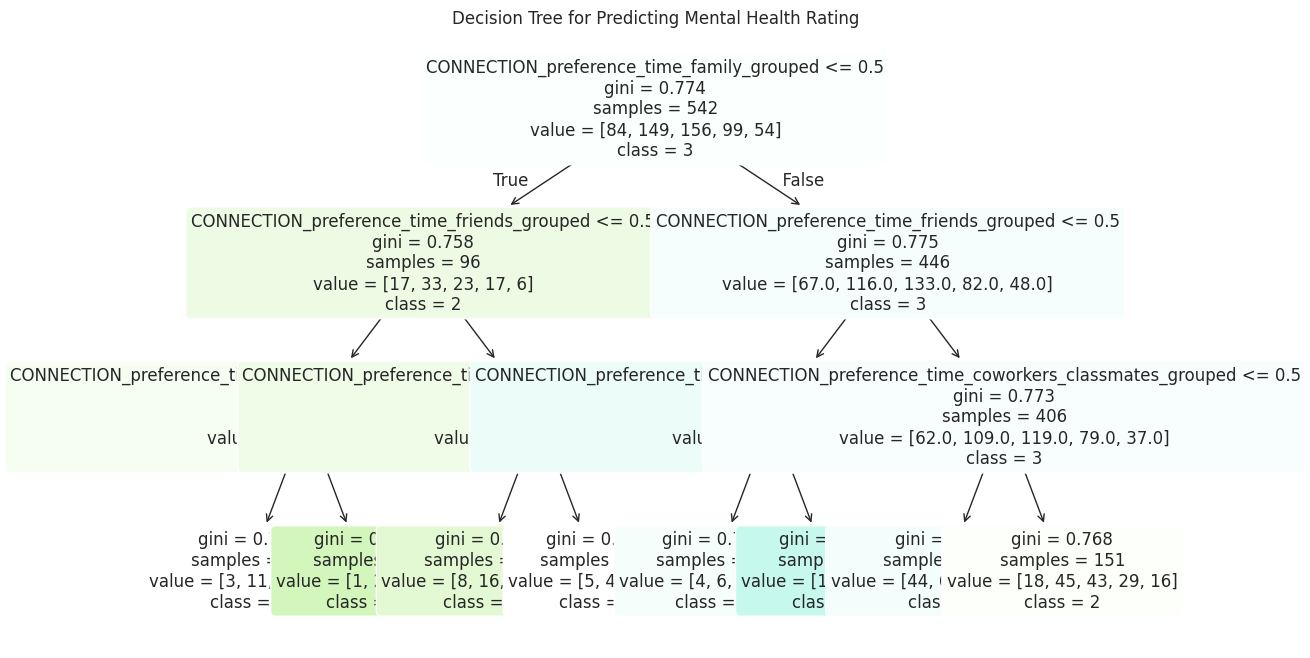

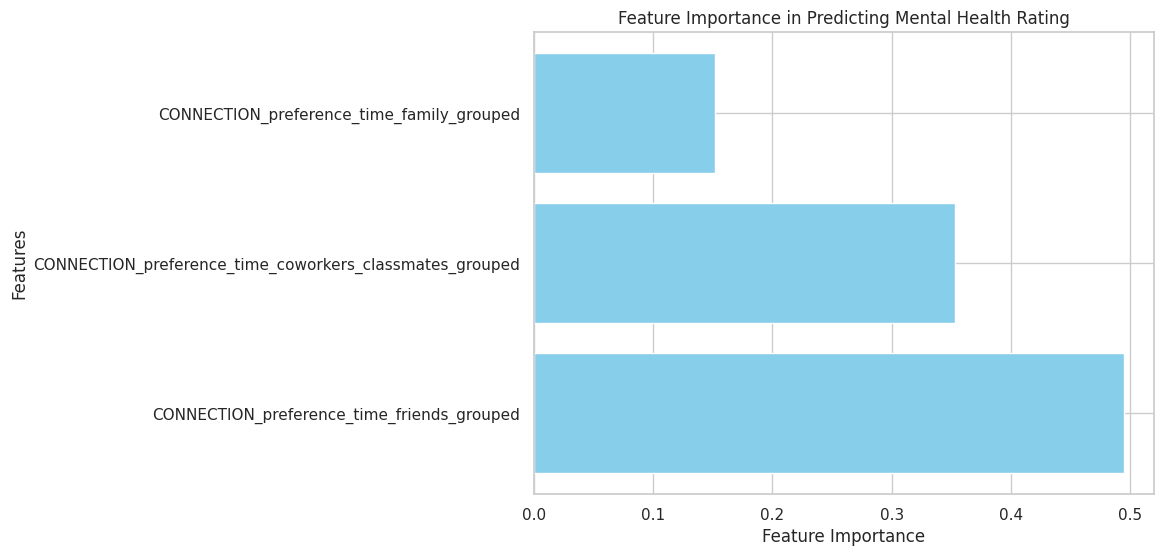


Feature Importance Values:
CONNECTION_preference_time_friends_grouped: 0.4948
CONNECTION_preference_time_coworkers_classmates_grouped: 0.3532
CONNECTION_preference_time_family_grouped: 0.1521


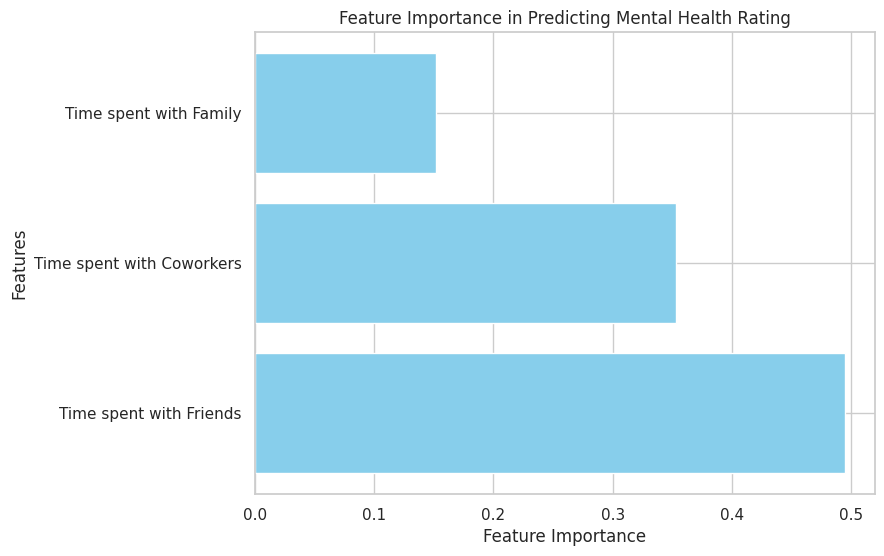

In [ ]:
# 1. 載入所需的庫
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# 2. 載入數據
cols = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv")
data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])

# Clean the data as described earlier
empty = (data.isna().sum() == data.shape[0])
data = data[empty.index[~empty]]  # Remove empty columns
dataV2 = data[data.REMOVE_case == 'No'].copy()  # Remove recommended cases
dataV2_cohort = dataV2[dataV2.SURVEY_cohort_participant].copy()  # Filter cohort participants
dataV2_cohortV2 = dataV2_cohort[dataV2_cohort.SURVEY_collection_year != 2023].copy()  # Exclude 2023 data

# Prepare the real_life dataset
real_life_final_data = dataV2_cohortV2[['CONNECTION_preference_time_friends_grouped',
                                        'CONNECTION_preference_time_coworkers_classmates_grouped',
                                        'CONNECTION_preference_time_family_grouped',
                                        'WELLNESS_self_rated_mental_health']].copy()

# Map the mental health rating to numerical values
real_life_final_data['WELLNESS_self_rated_mental_health'] = real_life_final_data['WELLNESS_self_rated_mental_health'].map(
    {"Excellent": 5.0, "Very good": 4.0, "Good": 3.0, "Fair": 2, "Poor": 1})

# Drop rows with missing values
real_life_cleaned_final_data = real_life_final_data.dropna()

# Create binary columns for the connection preference
real_life_binary_cleaned_final_data = real_life_cleaned_final_data.copy()
for col in real_life_binary_cleaned_final_data.iloc[:, :3]:
    real_life_binary_cleaned_final_data[col] = real_life_binary_cleaned_final_data[col].map(
        {"5 or more hours": 1, "Less than 1 hour": 0, "1 to 4 hours": 1, "No time": 0})

# 3. Prepare data for modeling
X = real_life_binary_cleaned_final_data[['CONNECTION_preference_time_friends_grouped',
                                         'CONNECTION_preference_time_coworkers_classmates_grouped',
                                         'CONNECTION_preference_time_family_grouped']]

# The target variable
y = real_life_binary_cleaned_final_data['WELLNESS_self_rated_mental_health']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Create and train the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 5. Make predictions
y_pred = dt_model.predict(X_test)

# 6. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 7. Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['1', '2', '3', '4', '5'],
          rounded=True, fontsize=12)
plt.title("Decision Tree for Predicting Mental Health Rating")
plt.show()

# 8. Get Feature Importance
feature_importance = dt_model.feature_importances_

# 9. Visualize the feature importance
plt.figure(figsize=(8, 6))
plt.barh(X.columns, feature_importance, color="skyblue")
plt.title("Feature Importance in Predicting Mental Health Rating")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

# 10. Print Feature Importance values
print("\nFeature Importance Values:")
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance:.4f}")

# 9. Visualize the feature importance
# Mapping old column names to new ones
feature_names_map = {
    'CONNECTION_preference_time_friends_grouped': 'Time spent with Friends',
    'CONNECTION_preference_time_coworkers_classmates_grouped': 'Time spent with Coworkers',
    'CONNECTION_preference_time_family_grouped': 'Time spent with Family'
}

# Replace the feature names with the new ones in the X.columns
new_feature_names = [feature_names_map[col] for col in X.columns]

plt.figure(figsize=(8, 6))
plt.barh(new_feature_names, feature_importance, color="skyblue")
plt.title("Feature Importance in Predicting Mental Health Rating")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()


<ipython-input-56-75897db1dd90>:11: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",


Accuracy: 0.26180257510729615
Confusion Matrix:
 [[ 0 18 11  0  0]
 [ 0 28 38  0  0]
 [ 0 37 33  0  0]
 [ 0 15 36  0  0]
 [ 0  8  9  0  0]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        29
         2.0       0.26      0.42      0.33        66
         3.0       0.26      0.47      0.34        70
         4.0       0.00      0.00      0.00        51
         5.0       0.00      0.00      0.00        17

    accuracy                           0.26       233
   macro avg       0.10      0.18      0.13       233
weighted avg       0.15      0.26      0.19       233



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


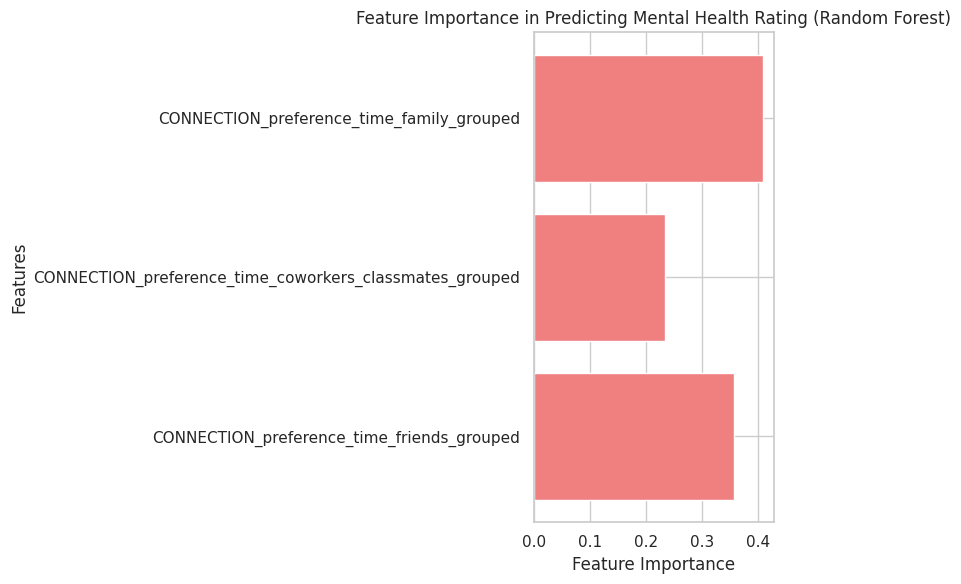


Feature Importance Values:
CONNECTION_preference_time_friends_grouped: 0.3576
CONNECTION_preference_time_coworkers_classmates_grouped: 0.2344
CONNECTION_preference_time_family_grouped: 0.4080


In [ ]:
# 1. 載入所需的庫
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# 2. 載入數據
cols = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv")
data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])

# Clean the data as described earlier
empty = (data.isna().sum() == data.shape[0])
data = data[empty.index[~empty]]  # Remove empty columns
dataV2 = data[data.REMOVE_case == 'No'].copy()  # Remove recommended cases
dataV2_cohort = dataV2[dataV2.SURVEY_cohort_participant].copy()  # Filter cohort participants
dataV2_cohortV2 = dataV2_cohort[dataV2_cohort.SURVEY_collection_year != 2023].copy()  # Exclude 2023 data

# Prepare the real_life dataset
real_life_final_data = dataV2_cohortV2[['CONNECTION_preference_time_friends_grouped',
                                        'CONNECTION_preference_time_coworkers_classmates_grouped',
                                        'CONNECTION_preference_time_family_grouped',
                                        'WELLNESS_self_rated_mental_health']].copy()

# Map the mental health rating to numerical values
real_life_final_data['WELLNESS_self_rated_mental_health'] = real_life_final_data['WELLNESS_self_rated_mental_health'].map(
    {"Excellent": 5.0, "Very good": 4.0, "Good": 3.0, "Fair": 2, "Poor": 1})

# Drop rows with missing values
real_life_cleaned_final_data = real_life_final_data.dropna()

# Create binary columns for the connection preference
real_life_binary_cleaned_final_data = real_life_cleaned_final_data.copy()
for col in real_life_binary_cleaned_final_data.iloc[:, :3]:
    real_life_binary_cleaned_final_data[col] = real_life_binary_cleaned_final_data[col].map(
        {"5 or more hours": 1, "Less than 1 hour": 0, "1 to 4 hours": 1, "No time": 0})

# 3. Prepare data for modeling
X = real_life_binary_cleaned_final_data[['CONNECTION_preference_time_friends_grouped',
                                         'CONNECTION_preference_time_coworkers_classmates_grouped',
                                         'CONNECTION_preference_time_family_grouped']]

# The target variable
y = real_life_binary_cleaned_final_data['WELLNESS_self_rated_mental_health']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 5. Make predictions
y_pred = rf_model.predict(X_test)

# 6. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 7. Visualize the feature importance
feature_importance = rf_model.feature_importances_

# Plotting the feature importance
plt.figure(figsize=(8, 6))
plt.barh(X.columns, feature_importance, color="lightcoral")
plt.title("Feature Importance in Predicting Mental Health Rating (Random Forest)")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# 8. Print Feature Importance values
print("\nFeature Importance Values:")
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance:.4f}")



# Virtual Analysis

In [ ]:
virtual_final_data = dataV2_cohortV2[['CONNECTION_activities_group_video_chat_p3m', 'CONNECTION_activities_video_chat_p3m', 'CONNECTION_activities_text_or_messaged_p3m', 'WELLNESS_self_rated_mental_health']].copy()

In [ ]:
virtual_final_data['WELLNESS_self_rated_mental_health'] = virtual_final_data['WELLNESS_self_rated_mental_health'].map(
    {"Excellent": 5.0, "Very good": 4.0, "Good": 3.0, "Fair": 2, "Poor": 1})

In [ ]:
virtual_cleaned_final_data = virtual_final_data.dropna()
virtual_cleaned_final_data

,CONNECTION_activities_group_video_chat_p3m,CONNECTION_activities_video_chat_p3m,CONNECTION_activities_text_or_messaged_p3m,WELLNESS_self_rated_mental_health
19,Less than monthly,Less than monthly,Weekly,3.0
21,Not in the past three months,Not in the past three months,Weekly,4.0
71,Not in the past three months,A few times a week,A few times a week,5.0
77,Not in the past three months,Less than monthly,A few times a month,3.0
78,Not in the past three months,Less than monthly,Weekly,4.0
...,...,...,...,...
11379,Monthly,A few times a week,Less than monthly,2.0
11380,A few times a month,A few times a month,Weekly,2.0
11412,Monthly,Weekly,Daily or almost daily,3.0
11428,Not in the past three months,A few times a week,Daily or almost daily,1.0


In [ ]:
virtual_binary_cleaned_final_data = virtual_cleaned_final_data.copy()
for col in virtual_binary_cleaned_final_data.iloc[:, :3]:
  virtual_binary_cleaned_final_data[col] = virtual_binary_cleaned_final_data[col].map(
      {'Not in the past three months': 0, 'Less than monthly': 0, 'Monthly': 1, 'A few times a month': 1, 'Weekly': 1, 'A few times a week': 1, 'Daily or almost daily': 1})

In [ ]:
virtual_binary_cleaned_final_data

,CONNECTION_activities_group_video_chat_p3m,CONNECTION_activities_video_chat_p3m,CONNECTION_activities_text_or_messaged_p3m,WELLNESS_self_rated_mental_health
19,0,0,1,3.0
21,0,0,1,4.0
71,0,1,1,5.0
77,0,0,1,3.0
78,0,0,1,4.0
...,...,...,...,...
11379,1,1,0,2.0
11380,1,1,1,2.0
11412,1,1,1,3.0
11428,0,1,1,1.0


In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# Ensure the target variable is numeric
# If it's categorical, it should be encoded or converted to numeric in this process.

# Define the OLS model specification
linear_model_specification = '''
    WELLNESS_self_rated_mental_health ~ I(CONNECTION_activities_group_video_chat_p3m)
                                        + I(CONNECTION_activities_video_chat_p3m)
                                        + I(CONNECTION_activities_text_or_messaged_p3m)
'''

# Fit the model using statsmodels
model = smf.ols(linear_model_specification, virtual_binary_cleaned_final_data).fit()

# Print the model summary
print("Model Summary:")
print(model.summary())


Model Summary:
                                    OLS Regression Results                                   
Dep. Variable:     WELLNESS_self_rated_mental_health   R-squared:                       0.047
Model:                                           OLS   Adj. R-squared:                  0.043
Method:                                Least Squares   F-statistic:                     13.07
Date:                               Sun, 01 Dec 2024   Prob (F-statistic):           2.45e-08
Time:                                       18:51:00   Log-Likelihood:                -1240.2
No. Observations:                                798   AIC:                             2488.
Df Residuals:                                    794   BIC:                             2507.
Df Model:                                          3                                         
Covariance Type:                           nonrobust                                         
                                             

<ipython-input-65-1e02cfa57498>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=virtual_binary_cleaned_final_data, x=var, ax=axes[i], palette="coolwarm")
<ipython-input-65-1e02cfa57498>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=virtual_binary_cleaned_final_data, x=var, ax=axes[i], palette="coolwarm")
<ipython-input-65-1e02cfa57498>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=virtual_binary_cleaned_final_data, x=var, ax=axes[i], palette="coolwarm")


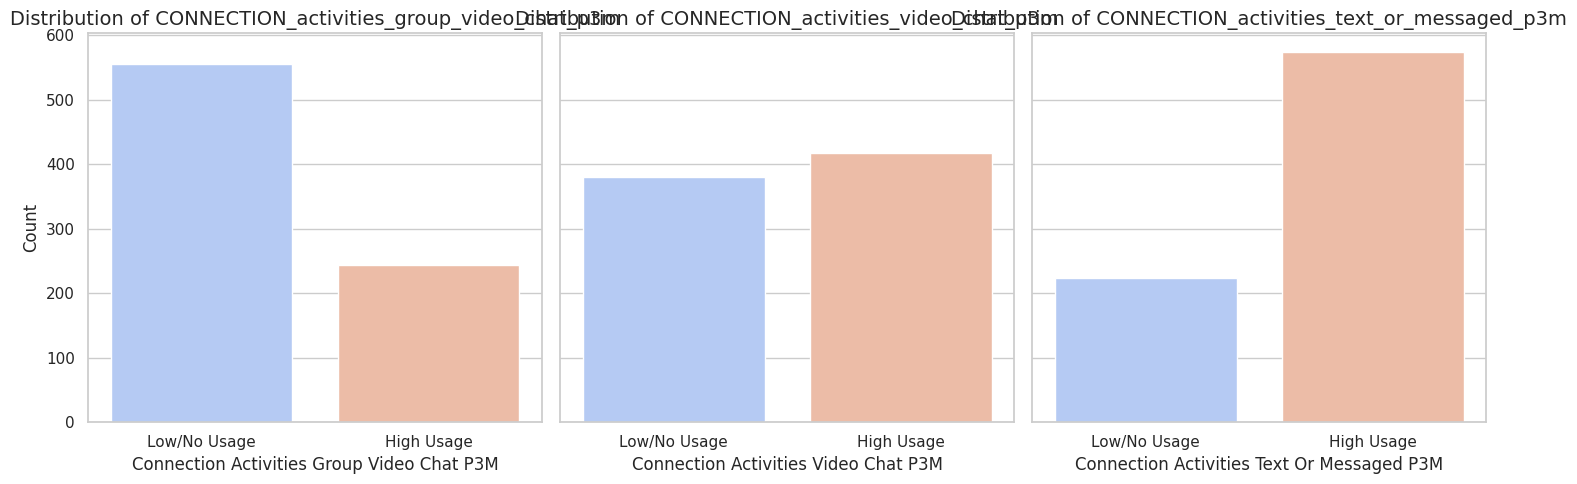

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

variables = [
    'CONNECTION_activities_group_video_chat_p3m',
    'CONNECTION_activities_video_chat_p3m',
    'CONNECTION_activities_text_or_messaged_p3m'
]

for i, var in enumerate(variables):
    sns.countplot(data=virtual_binary_cleaned_final_data, x=var, ax=axes[i], palette="coolwarm")
    axes[i].set_title(f"Distribution of {var}", fontsize=14)
    axes[i].set_xlabel(var.replace('_', ' ').title(), fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['Low/No Usage', 'High Usage'])

plt.tight_layout()
plt.show()


<ipython-input-75-a12e48d5a0c1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-75-a12e48d5a0c1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-75-a12e48d5a0c1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


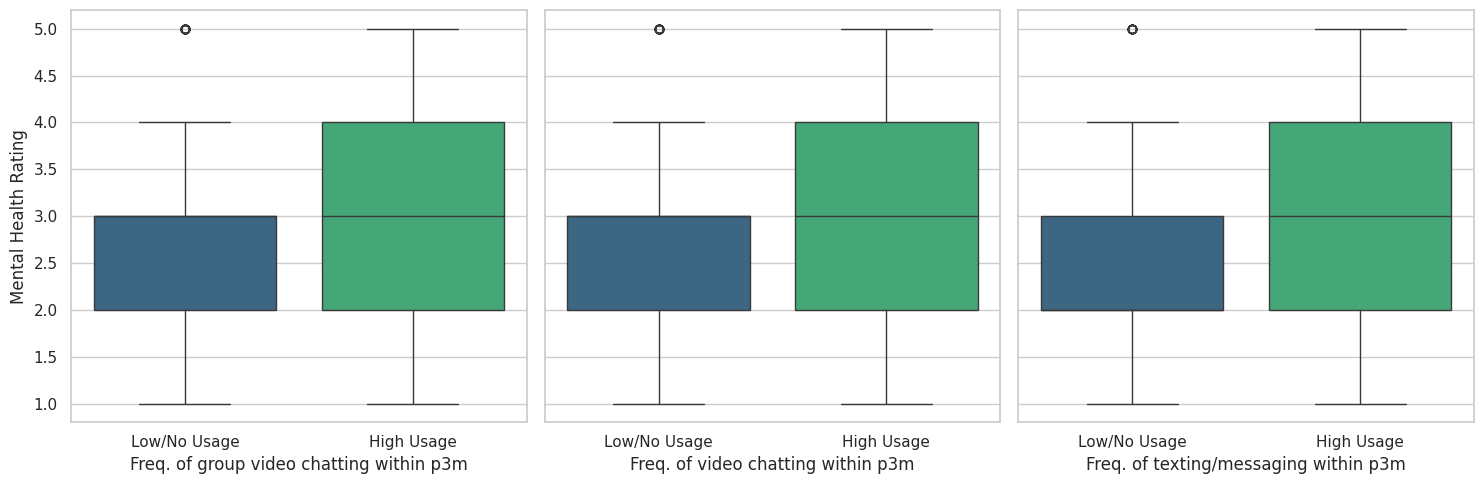

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, var in enumerate(variables):
    sns.boxplot(
        data=virtual_binary_cleaned_final_data,
        x=var,
        y='WELLNESS_self_rated_mental_health',
        ax=axes[i],
        palette="viridis"
    )
    # axes[i].set_title(f"Impact of {var} on Mental Health", fontsize=14)
    axes[i].set_xlabel(var.replace('_', ' ').title(), fontsize=12)
    axes[i].set_ylabel("Mental Health Rating", fontsize=12)
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['Low/No Usage', 'High Usage'])

axes[0].set_xlabel('Freq. of group video chatting within p3m', fontsize=12)
axes[1].set_xlabel('Freq. of video chatting within p3m', fontsize=12)
axes[2].set_xlabel('Freq. of texting/messaging within p3m', fontsize=12)

plt.tight_layout()
plt.show()

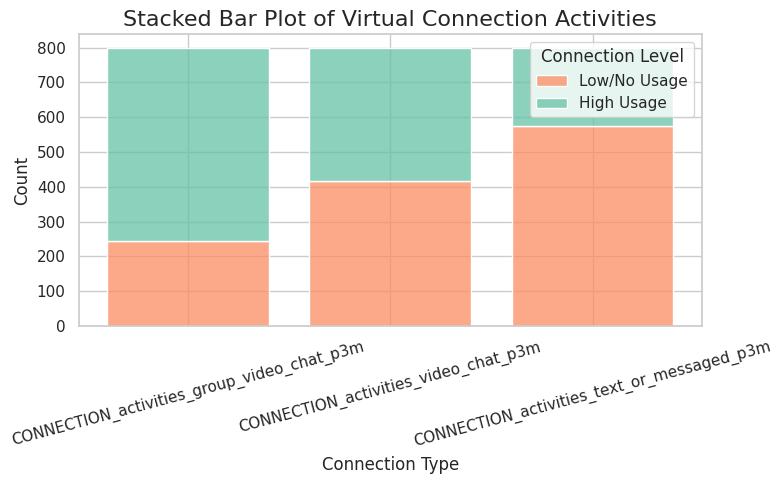

In [ ]:
# Melt the data for stacked bar plot
binary_data_melted = virtual_binary_cleaned_final_data.melt(
    id_vars=['WELLNESS_self_rated_mental_health'],
    value_vars=variables,
    var_name='Connection_Type',
    value_name='Connection_Level'
)

plt.figure(figsize=(8, 5))
sns.histplot(
    data=binary_data_melted,
    x='Connection_Type',
    hue='Connection_Level',
    multiple='stack',
    palette="Set2",
    shrink=0.8
)
plt.title("Stacked Bar Plot of Virtual Connection Activities", fontsize=16)
plt.xlabel("Connection Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=15)
plt.legend(title="Connection Level", labels=["Low/No Usage", "High Usage"], loc='upper right')
plt.tight_layout()
plt.show()

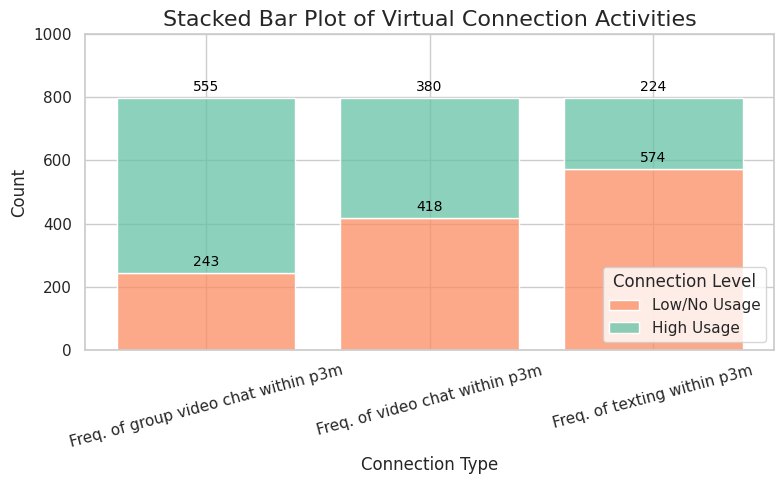

In [ ]:
# Melt the data for stacked bar plot
binary_data_melted = virtual_binary_cleaned_final_data.melt(
    id_vars=['WELLNESS_self_rated_mental_health'],
    value_vars=variables,
    var_name='Connection_Type',
    value_name='Connection_Level'
)

plt.figure(figsize=(8, 5))
ax = sns.histplot(
    data=binary_data_melted,
    x='Connection_Type',
    hue='Connection_Level',
    multiple='stack',
    palette="Set2",
    shrink=0.8
)

# Add labels to each segment of the stacked bars
for bar in ax.patches:
    # Get the bar's coordinates and height
    bar_x = bar.get_x() + bar.get_width() / 2
    bar_height = bar.get_height()
    if bar_height > 0:  # Only label bars with height > 0
        ax.annotate(
            text=f'{int(bar_height)}',
            xy=(bar_x, bar.get_y() + bar_height),
            xytext=(0, 3),  # Offset the label slightly above the bar
            textcoords="offset points",
            ha='center', va='bottom', fontsize=10, color="black"
        )

# Extend the y-axis to 1000
ax.set_ylim(0, 1000)

# Replace x-axis labels
new_labels = [
    "Freq. of group video chat within p3m",
    "Freq. of video chat within p3m",
    "Freq. of texting within p3m"
]

# Set the x-axis labels
plt.xticks(ticks=[0, 1, 2], labels=new_labels, rotation=15)

# Title, labels, and legend
plt.title("Stacked Bar Plot of Virtual Connection Activities", fontsize=16)
plt.xlabel("Connection Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Connection Level", labels=["Low/No Usage", "High Usage"], loc='lower right')

plt.tight_layout()
plt.show()


In [ ]:
virtual_binary_cleaned_final_data.columns

Index(['CONNECTION_activities_group_video_chat_p3m',
       'CONNECTION_activities_video_chat_p3m',
       'CONNECTION_activities_text_or_messaged_p3m',
       'WELLNESS_self_rated_mental_health'],
      dtype='object')

In [ ]:
# 1. Import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Define features and target
X = virtual_binary_cleaned_final_data.drop(columns=['WELLNESS_self_rated_mental_health'])
y = virtual_binary_cleaned_final_data['WELLNESS_self_rated_mental_health']

# 3. Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 5. Print confusion matrix and classification report (optional)
from sklearn.metrics import confusion_matrix, classification_report
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 6. Feature Importances
importances = clf.feature_importances_

# 7. Plot Feature Importances
plt.figure(figsize=(10, 6))

# Sort the features by importance
sorted_idx = importances.argsort()

# Create a mapping for new feature names
feature_names_map = {
    'CONNECTION_activities_group_video_chat_p3m': 'Freq. of group video chat within p3m',
    'CONNECTION_activities_video_chat_p3m': 'Freq. of video chat within p3m',
    'CONNECTION_activities_text_or_messaged_p3m': 'Freq. of texting within p3m'
}

# Replace old feature names with the new ones
new_feature_names = [feature_names_map.get(col, col) for col in X.columns[sorted_idx]]

# Create a horizontal bar plot
sns.barplot(x=importances[sorted_idx], y=new_feature_names, palette='viridis')

# Add labels and title
plt.title('Feature Importance from Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Display the plot
plt.show()


ValueError: could not convert string to float: 'Virtual'

In [ ]:
# 1. Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 2. Define features and target
X = virtual_binary_cleaned_final_data.drop(columns=['WELLNESS_self_rated_mental_health'])
y = virtual_binary_cleaned_final_data['WELLNESS_self_rated_mental_health']

# 3. Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialize and train the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# 5. Print confusion matrix and classification report
y_pred_rf = rf_clf.predict(X_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# 6. Feature Importances
importances_rf = rf_clf.feature_importances_

# 7. Plot Feature Importances
plt.figure(figsize=(10, 6))

# Sort the features by importance
sorted_idx_rf = importances_rf.argsort()

# Create a mapping for new feature names
feature_names_map_rf = {
    'CONNECTION_activities_group_video_chat_p3m': 'Freq. of group video chat within p3m',
    'CONNECTION_activities_video_chat_p3m': 'Freq. of video chat within p3m',
    'CONNECTION_activities_text_or_messaged_p3m': 'Freq. of texting within p3m'
}

# Replace old feature names with the new ones
new_feature_names_rf = [feature_names_map_rf.get(col, col) for col in X.columns[sorted_idx_rf]]

# Create a horizontal bar plot
sns.barplot(x=importances_rf[sorted_idx_rf], y=new_feature_names_rf, palette='coolwarm')

# Add labels and title
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Display the plot
plt.show()


ValueError: could not convert string to float: 'Virtual'

<ipython-input-80-5f5e93d38ec0>:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Low/No Time/Usage', 'High Time/Usage'])
<ipython-input-80-5f5e93d38ec0>:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Low/No Time/Usage', 'High Time/Usage'])
<ipython-input-80-5f5e93d38ec0>:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Low/No Time/Usage', 'High Time/Usage'])
<ipython-input-80-5f5e93d38ec0>:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Low/No Time/Usage', 'High Time/Usage'])
<ipython-input-80-5f5e93d38ec0>:67: UserWarning: set_ticklabels() should only be used with a

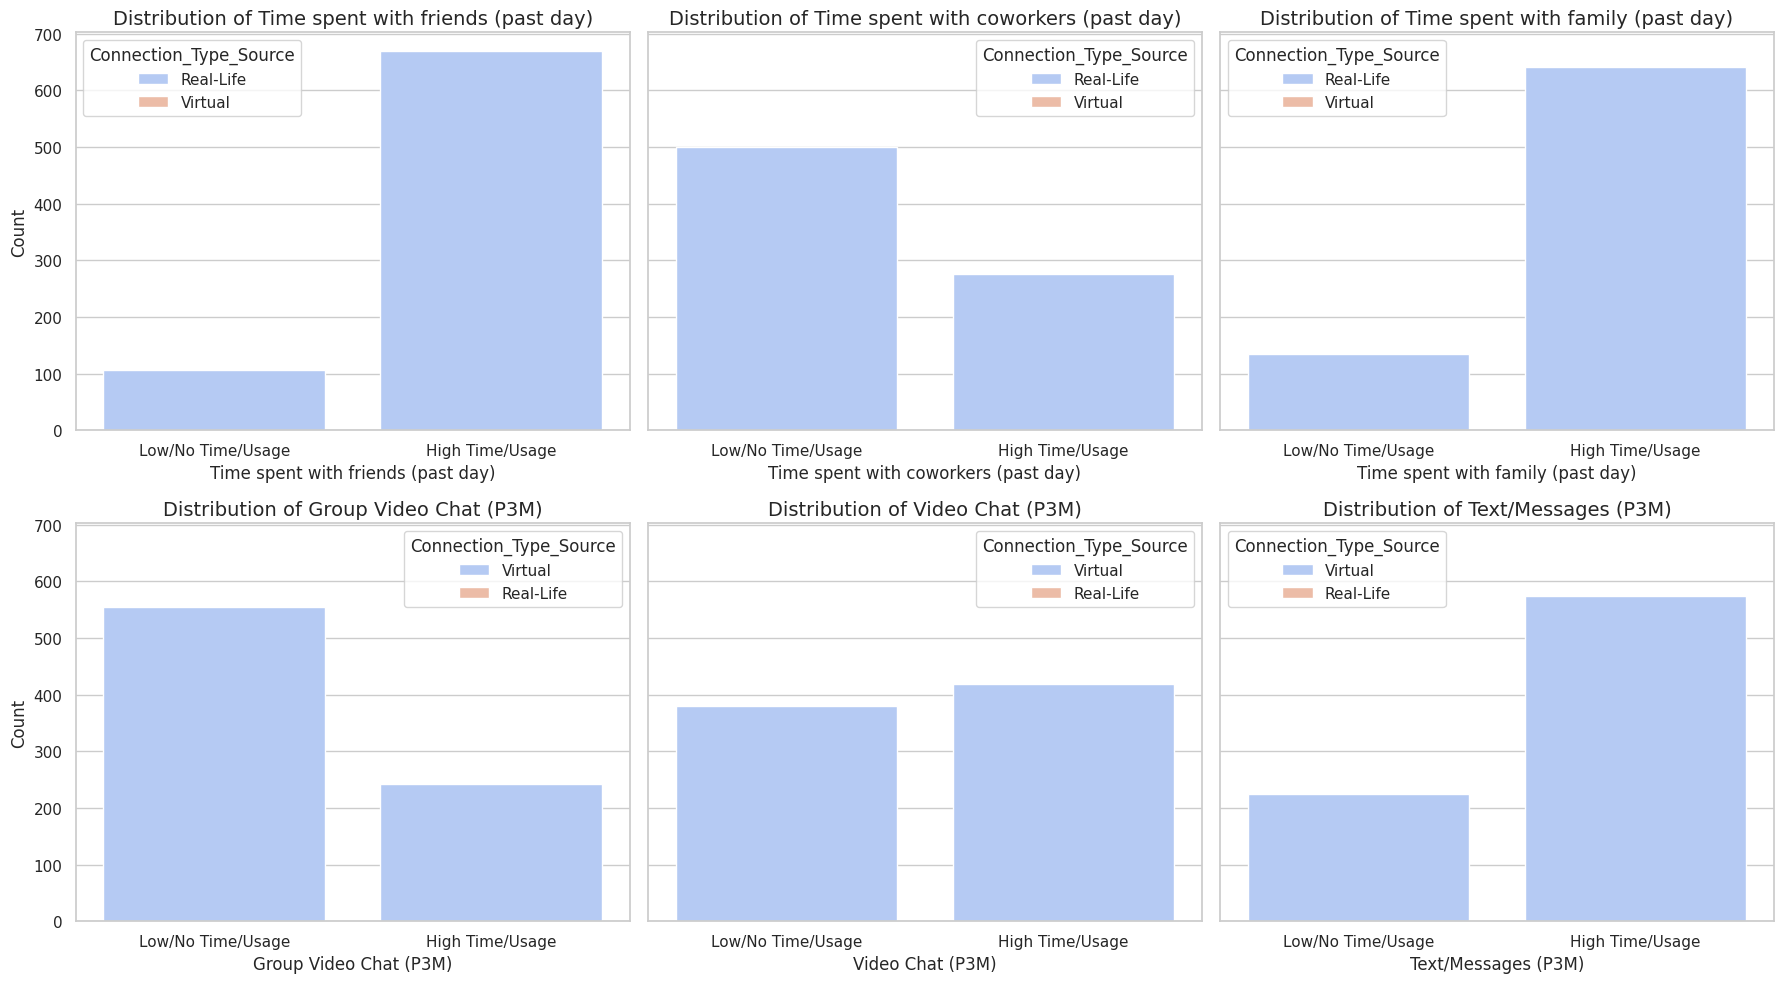

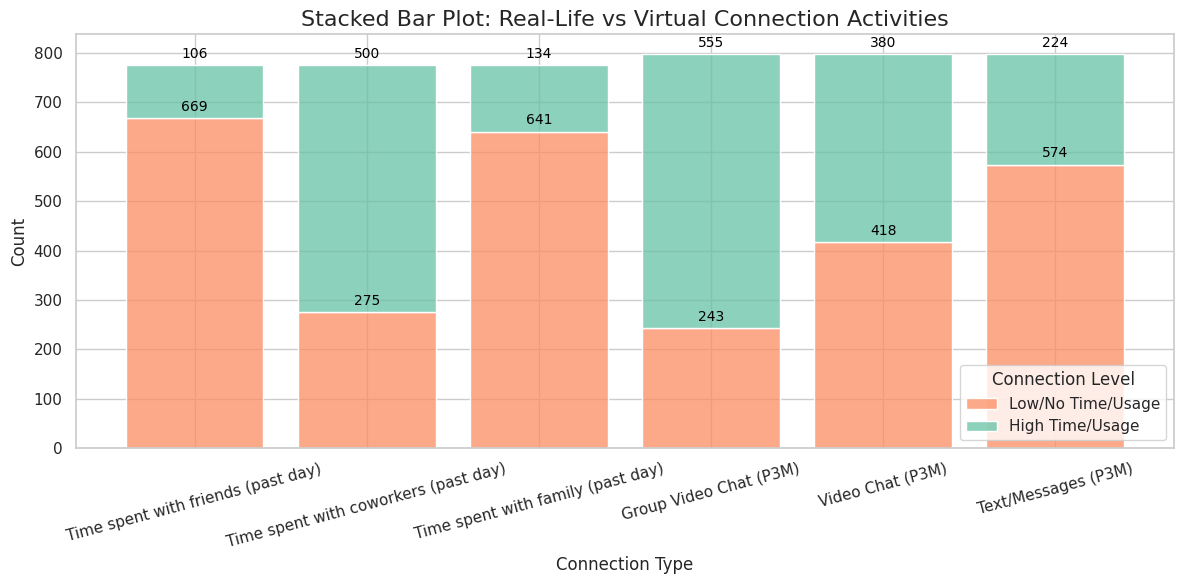

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="whitegrid")


# Combine the two datasets into one for comparison
# Create identifiers for the data source
binary_data['Connection_Type_Source'] = 'Real-Life'
virtual_binary_cleaned_final_data['Connection_Type_Source'] = 'Virtual'

# Combine datasets
combined_data = pd.concat([binary_data, virtual_binary_cleaned_final_data], axis=0)

# Define variables for both datasets
real_life_variables = [
    'CONNECTION_preference_time_friends_grouped',
    'CONNECTION_preference_time_coworkers_classmates_grouped',
    'CONNECTION_preference_time_family_grouped'
]

virtual_variables = [
    'CONNECTION_activities_group_video_chat_p3m',
    'CONNECTION_activities_video_chat_p3m',
    'CONNECTION_activities_text_or_messaged_p3m'
]

# Rename columns for clarity and merge into one list
combined_data = combined_data.rename(columns={
    'CONNECTION_preference_time_friends_grouped': 'Time spent with friends (past day)',
    'CONNECTION_preference_time_coworkers_classmates_grouped': 'Time spent with coworkers (past day)',
    'CONNECTION_preference_time_family_grouped': 'Time spent with family (past day)',
    'CONNECTION_activities_group_video_chat_p3m': 'Group Video Chat (P3M)',
    'CONNECTION_activities_video_chat_p3m': 'Video Chat (P3M)',
    'CONNECTION_activities_text_or_messaged_p3m': 'Text/Messages (P3M)'
})

variables = [
    'Time spent with friends (past day)', 'Time spent with coworkers (past day)', 'Time spent with family (past day)',
    'Group Video Chat (P3M)', 'Video Chat (P3M)', 'Text/Messages (P3M)'
]

# Melt the combined data for easy plotting
combined_data_melted = combined_data.melt(
    id_vars=['WELLNESS_self_rated_mental_health', 'Connection_Type_Source'],
    value_vars=variables,
    var_name='Connection_Type',
    value_name='Connection_Level'
)

# Create comparison plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)

for i, var in enumerate(variables):
    ax = axes[i // 3, i % 3]
    sns.countplot(
        data=combined_data_melted[combined_data_melted['Connection_Type'] == var],
        x='Connection_Level',
        hue='Connection_Type_Source',
        ax=ax,
        palette="coolwarm"
    )
    ax.set_title(f"Distribution of {var}", fontsize=14)
    ax.set_xlabel(var, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.set_xticklabels(['Low/No Time/Usage', 'High Time/Usage'])

# Adjust layout
plt.tight_layout()
plt.show()

# Stacked bar plot
plt.figure(figsize=(12, 6))
ax = sns.histplot(
    data=combined_data_melted,
    x='Connection_Type',
    hue='Connection_Level',
    multiple='stack',
    palette="Set2",
    shrink=0.8
)

# Add labels showing exact counts on top of each stacked segment
for p in ax.patches:
    # Get the coordinates and height of the bar
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    if height > 0:  # Only annotate if the bar height is greater than 0
        ax.annotate(
            f'{int(height)}',  # Display the count
            (x, p.get_y() + height),  # Position the label
            textcoords="offset points",
            xytext=(0, 3),  # Slightly offset the label
            ha='center', va='bottom', fontsize=10, color="black"
        )

# Title, labels, and legend
plt.title("Stacked Bar Plot: Real-Life vs Virtual Connection Activities", fontsize=16)
plt.xlabel("Connection Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=15)

# Move the legend to the lower right
plt.legend(title="Connection Level", labels=["Low/No Time/Usage", "High Time/Usage"], loc='lower right')

plt.tight_layout()
plt.show()


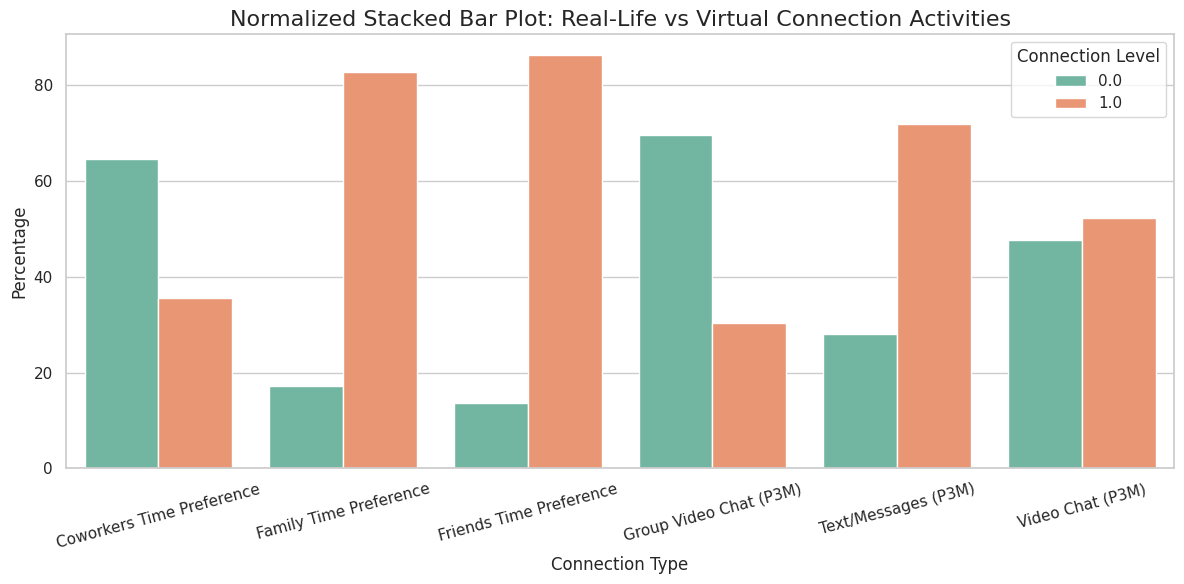

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="whitegrid")

# Combine datasets (as in the original code)
binary_data['Connection_Type_Source'] = 'Real-Life'
virtual_binary_cleaned_final_data['Connection_Type_Source'] = 'Virtual'

combined_data = pd.concat([binary_data, virtual_binary_cleaned_final_data], axis=0)

# Rename columns for clarity
combined_data = combined_data.rename(columns={
    'CONNECTION_preference_time_friends_grouped': 'Friends Time Preference',
    'CONNECTION_preference_time_coworkers_classmates_grouped': 'Coworkers Time Preference',
    'CONNECTION_preference_time_family_grouped': 'Family Time Preference',
    'CONNECTION_activities_group_video_chat_p3m': 'Group Video Chat (P3M)',
    'CONNECTION_activities_video_chat_p3m': 'Video Chat (P3M)',
    'CONNECTION_activities_text_or_messaged_p3m': 'Text/Messages (P3M)'
})

variables = [
    'Friends Time Preference', 'Coworkers Time Preference', 'Family Time Preference',
    'Group Video Chat (P3M)', 'Video Chat (P3M)', 'Text/Messages (P3M)'
]

# Melt the combined data for easy plotting
combined_data_melted = combined_data.melt(
    id_vars=['WELLNESS_self_rated_mental_health', 'Connection_Type_Source'],
    value_vars=variables,
    var_name='Connection_Type',
    value_name='Connection_Level'
)

# Create a normalized dataframe
normalized_data = (
    combined_data_melted.groupby(['Connection_Type', 'Connection_Level'])
    .size()
    .reset_index(name='Count')
    .pivot(index='Connection_Type', columns='Connection_Level', values='Count')
    .fillna(0)
)

# Normalize to percentages
normalized_data = normalized_data.div(normalized_data.sum(axis=1), axis=0) * 100

# Convert back to a long format for seaborn plotting
normalized_data_long = normalized_data.reset_index().melt(
    id_vars='Connection_Type', var_name='Connection_Level', value_name='Percentage'
)

# Plot the normalized stacked bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=normalized_data_long,
    x='Connection_Type',
    y='Percentage',
    hue='Connection_Level',
    palette="Set2"
)
plt.title("Normalized Stacked Bar Plot: Real-Life vs Virtual Connection Activities", fontsize=16)
plt.xlabel("Connection Type", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.xticks(rotation=15)
plt.legend(title="Connection Level", loc='upper right')
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

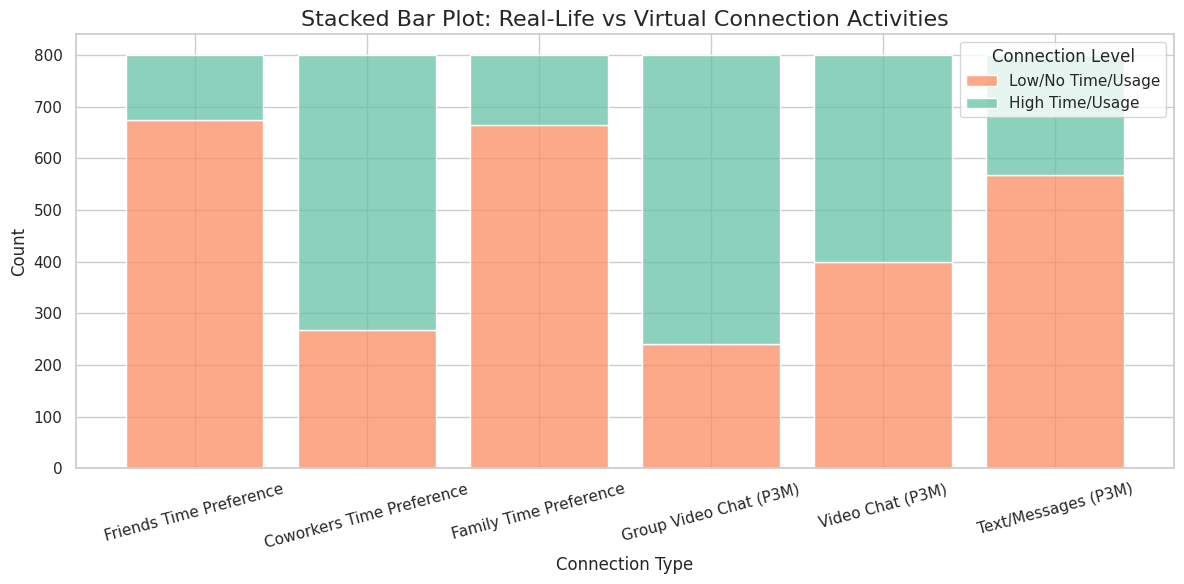

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import resample

# Combine the two datasets into one for comparison
real_life_binary_cleaned_final_data['Connection_Type_Source'] = 'Real-Life'
virtual_binary_cleaned_final_data['Connection_Type_Source'] = 'Virtual'

# Set target size for resampling
target_size = 800

# Resample real-life data
real_life_resampled = resample(
    real_life_binary_cleaned_final_data,
    replace=len(real_life_binary_cleaned_final_data) < target_size,
    n_samples=target_size,
    random_state=42
)

# Resample virtual data
virtual_resampled = resample(
    virtual_binary_cleaned_final_data,
    replace=len(virtual_binary_cleaned_final_data) < target_size,
    n_samples=target_size,
    random_state=42
)

# Combine the resampled datasets
combined_data = pd.concat([real_life_resampled, virtual_resampled], axis=0)

# Rename columns for clarity
combined_data = combined_data.rename(columns={
    'CONNECTION_preference_time_friends_grouped': 'Friends Time Preference',
    'CONNECTION_preference_time_coworkers_classmates_grouped': 'Coworkers Time Preference',
    'CONNECTION_preference_time_family_grouped': 'Family Time Preference',
    'CONNECTION_activities_group_video_chat_p3m': 'Group Video Chat (P3M)',
    'CONNECTION_activities_video_chat_p3m': 'Video Chat (P3M)',
    'CONNECTION_activities_text_or_messaged_p3m': 'Text/Messages (P3M)'
})

# Define variables
variables = [
    'Friends Time Preference', 'Coworkers Time Preference', 'Family Time Preference',
    'Group Video Chat (P3M)', 'Video Chat (P3M)', 'Text/Messages (P3M)'
]

# Melt the combined data for easy plotting
combined_data_melted = combined_data.melt(
    id_vars=['WELLNESS_self_rated_mental_health', 'Connection_Type_Source'],
    value_vars=variables,
    var_name='Connection_Type',
    value_name='Connection_Level'
)

# Create comparison plots
# fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)

# for i, var in enumerate(variables):
#     ax = axes[i // 3, i % 3]
#     sns.countplot(
#         data=combined_data_melted[combined_data_melted['Connection_Type'] == var],
#         x='Connection_Level',
#         hue='Connection_Type_Source',
#         ax=ax,
#         palette="coolwarm"
#     )
#     ax.set_title(f"Distribution of {var}", fontsize=14)
#     ax.set_xlabel(var, fontsize=12)
#     ax.set_ylabel("Count", fontsize=12)
#     ax.set_xticklabels(['Low/No Time/Usage', 'High Time/Usage'])

# Adjust layout
plt.tight_layout()
plt.show()

# Stacked bar plot
plt.figure(figsize=(12, 6))
sns.histplot(
    data=combined_data_melted,
    x='Connection_Type',
    hue='Connection_Level',
    multiple='stack',
    palette="Set2",
    shrink=0.8
)
plt.title("Stacked Bar Plot: Real-Life vs Virtual Connection Activities", fontsize=16)
plt.xlabel("Connection Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=15)
plt.legend(title="Connection Level", labels=["Low/No Time/Usage", "High Time/Usage"], loc='upper right')
plt.tight_layout()
plt.show()


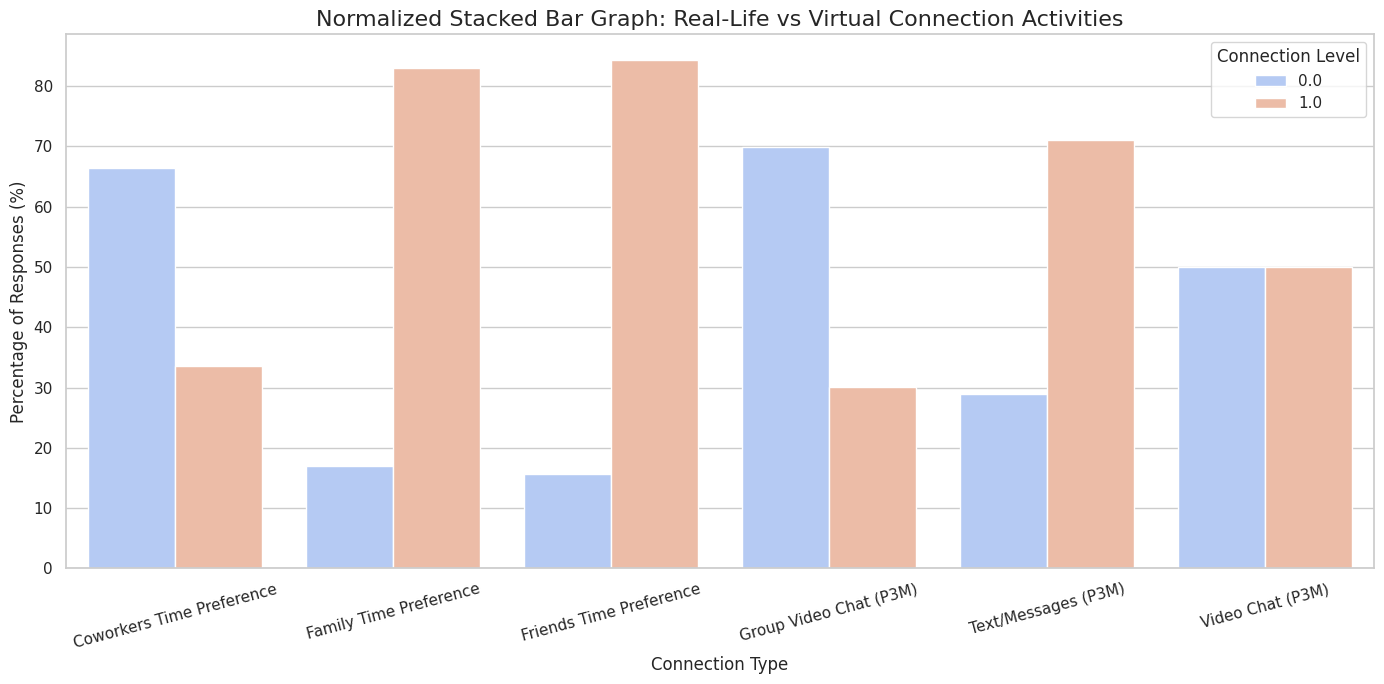

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Group the data and calculate counts
grouped_data = combined_data_melted.groupby(
    ['Connection_Type', 'Connection_Type_Source', 'Connection_Level']
).size().reset_index(name='Count')

# Normalize counts to percentages within each Connection_Type
grouped_data['Percentage'] = grouped_data.groupby(
    ['Connection_Type', 'Connection_Type_Source']
)['Count'].transform(lambda x: x / x.sum() * 100)

# Pivot data for plotting
pivot_data = grouped_data.pivot_table(
    index=['Connection_Type', 'Connection_Type_Source'],
    columns='Connection_Level',
    values='Percentage',
    fill_value=0
).reset_index()

# Melt pivoted data back to long format for seaborn
normalized_data = pivot_data.melt(
    id_vars=['Connection_Type', 'Connection_Type_Source'],
    value_name='Percentage',
    var_name='Connection_Level'
)

# Create the normalized stacked bar plot
plt.figure(figsize=(14, 7))
sns.barplot(
    data=normalized_data,
    x='Connection_Type',
    y='Percentage',
    hue='Connection_Level',
    palette='coolwarm'
)

# Add labels and title
plt.title('Normalized Stacked Bar Graph: Real-Life vs Virtual Connection Activities', fontsize=16)
plt.xlabel('Connection Type', fontsize=12)
plt.ylabel('Percentage of Responses (%)', fontsize=12)
plt.xticks(rotation=15)
plt.legend(title='Connection Level', loc='upper right')
plt.tight_layout()
plt.show()


<ipython-input-33-ba3fe96189e7>:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


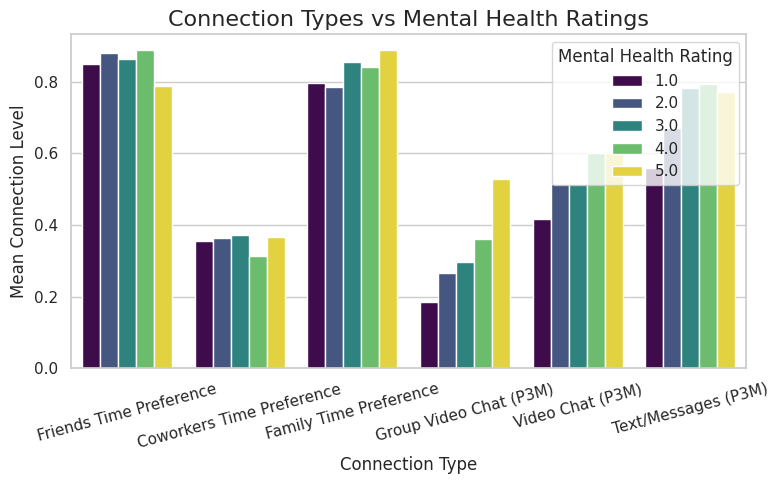

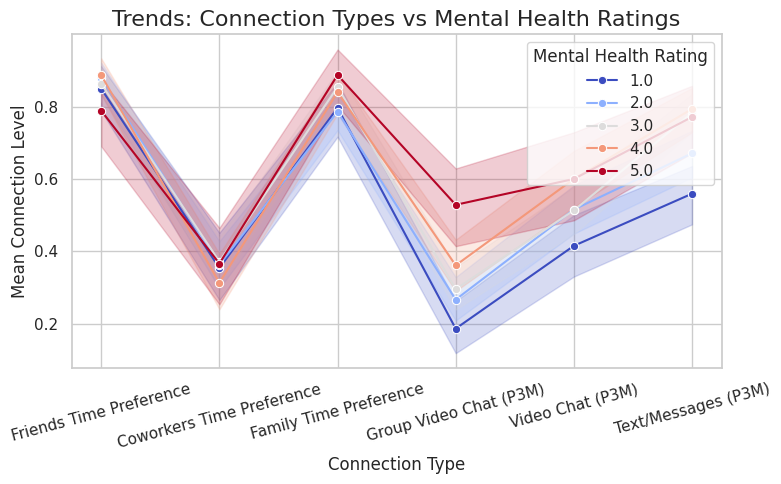

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the datasets are combined with a "Connection_Type_Source" column
real_life_binary_cleaned_final_data['Connection_Type_Source'] = 'Real-Life'
virtual_binary_cleaned_final_data['Connection_Type_Source'] = 'Virtual'

# Combine datasets
combined_data = pd.concat([real_life_binary_cleaned_final_data, virtual_binary_cleaned_final_data], axis=0)

# Rename columns for clarity
combined_data = combined_data.rename(columns={
    'CONNECTION_preference_time_friends_grouped': 'Friends Time Preference',
    'CONNECTION_preference_time_coworkers_classmates_grouped': 'Coworkers Time Preference',
    'CONNECTION_preference_time_family_grouped': 'Family Time Preference',
    'CONNECTION_activities_group_video_chat_p3m': 'Group Video Chat (P3M)',
    'CONNECTION_activities_video_chat_p3m': 'Video Chat (P3M)',
    'CONNECTION_activities_text_or_messaged_p3m': 'Text/Messages (P3M)'
})

# Define variables for analysis
real_life_variables = ['Friends Time Preference', 'Coworkers Time Preference', 'Family Time Preference']
virtual_variables = ['Group Video Chat (P3M)', 'Video Chat (P3M)', 'Text/Messages (P3M)']

# Melt the data for visualization
combined_data_melted = combined_data.melt(
    id_vars=['WELLNESS_self_rated_mental_health', 'Connection_Type_Source'],
    value_vars=real_life_variables + virtual_variables,
    var_name='Connection_Type',
    value_name='Connection_Level'
)

# Plot the relationship between connection types and mental health ratings
plt.figure(figsize=(8, 5))
sns.barplot(
    data=combined_data_melted,
    x='Connection_Type',
    y='Connection_Level',
    hue='WELLNESS_self_rated_mental_health',
    ci=None,
    palette="viridis"
)
plt.title("Connection Types vs Mental Health Ratings", fontsize=16)
plt.xlabel("Connection Type", fontsize=12)
plt.ylabel("Mean Connection Level", fontsize=12)
plt.xticks(rotation=15)
plt.legend(title="Mental Health Rating", loc='upper right')
plt.tight_layout()
plt.show()

# Line plot to show trends
plt.figure(figsize=(8, 5))
sns.lineplot(
    data=combined_data_melted,
    x='Connection_Type',
    y='Connection_Level',
    hue='WELLNESS_self_rated_mental_health',
    marker='o',
    palette="coolwarm"
)
plt.title("Trends: Connection Types vs Mental Health Ratings", fontsize=16)
plt.xlabel("Connection Type", fontsize=12)
plt.ylabel("Mean Connection Level", fontsize=12)
plt.xticks(rotation=15)
plt.legend(title="Mental Health Rating", loc='upper right')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# 将时间分组列映射为连续变量
time_mapping = {
    "No time": 0,
    "Less than 1 hour": 0.5,
    "1-2 hours": 1.5,
    "3-4 hours": 3.5,
    "5 or more hours": 5
}

# 对时间分组列进行映射
for col in ['CONNECTION_preference_time_friends_grouped',
            'CONNECTION_preference_time_coworkers_classmates_grouped',
            'CONNECTION_preference_time_family_grouped']:
    combined_cleaned_data[col] = combined_cleaned_data[col].map(time_mapping)

# 定义新的线性回归模型
model_specification = '''
    WELLNESS_self_rated_mental_health ~ CONNECTION_preference_time_friends_grouped
                                        + CONNECTION_preference_time_coworkers_classmates_grouped
                                        + CONNECTION_preference_time_family_grouped
                                        + I(CONNECTION_activities_group_video_chat_p3m)
                                        + I(CONNECTION_activities_video_chat_p3m)
                                        + I(CONNECTION_activities_text_or_messaged_p3m)
'''

# 使用 statsmodels 拟合模型
model = smf.ols(model_specification, data=combined_cleaned_data).fit()

# 输出模型摘要
print("Model Summary:")
print(model.summary())


Model Summary:
                                    OLS Regression Results                                   
Dep. Variable:     WELLNESS_self_rated_mental_health   R-squared:                       0.107
Model:                                           OLS   Adj. R-squared:                  0.085
Method:                                Least Squares   F-statistic:                     4.853
Date:                               Sun, 01 Dec 2024   Prob (F-statistic):           0.000106
Time:                                       16:28:25   Log-Likelihood:                -390.68
No. Observations:                                250   AIC:                             795.4
Df Residuals:                                    243   BIC:                             820.0
Df Model:                                          6                                         
Covariance Type:                           nonrobust                                         
                                             

<ipython-input-36-140f9f66408c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_cleaned_data[col] = combined_cleaned_data[col].map(time_mapping)
<ipython-input-36-140f9f66408c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_cleaned_data[col] = combined_cleaned_data[col].map(time_mapping)
<ipython-input-36-140f9f66408c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

<ipython-input-44-b9b2c061284d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_cleaned_data[col] = combined_cleaned_data[col].map(time_mapping)
<ipython-input-44-b9b2c061284d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_cleaned_data[col] = combined_cleaned_data[col].map(time_mapping)
<ipython-input-44-b9b2c061284d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

Mean Squared Error: 1.3299400207328378
R^2 Score: 0.020125709891256394


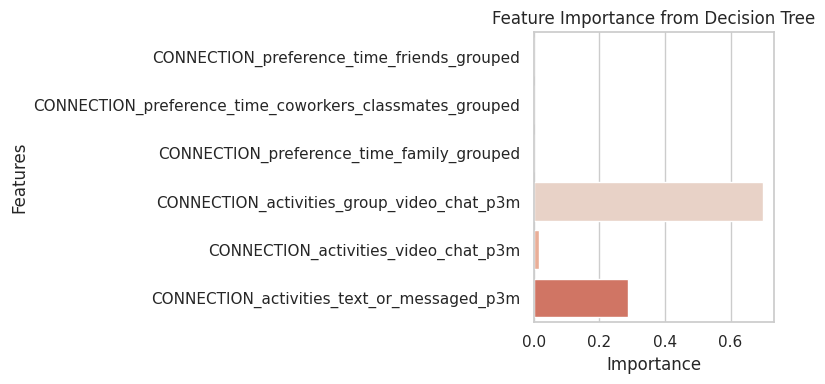


Feature Importance Values:
CONNECTION_preference_time_friends_grouped: 0.0000
CONNECTION_preference_time_coworkers_classmates_grouped: 0.0000
CONNECTION_preference_time_family_grouped: 0.0000
CONNECTION_activities_group_video_chat_p3m: 0.6973
CONNECTION_activities_video_chat_p3m: 0.0165
CONNECTION_activities_text_or_messaged_p3m: 0.2862


In [ ]:
# Import required libraries
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean the data (using the time_mapping approach)
time_mapping = {
    "No time": 0,
    "Less than 1 hour": 0.5,
    "1-2 hours": 1.5,
    "3-4 hours": 3.5,
    "5 or more hours": 5
}

# Ensure the columns are properly mapped to numerical values
for col in [
    'CONNECTION_preference_time_friends_grouped',
    'CONNECTION_preference_time_coworkers_classmates_grouped',
    'CONNECTION_preference_time_family_grouped'
]:
    combined_cleaned_data[col] = combined_cleaned_data[col].map(time_mapping)

# Define predictors and target
predictors = [
    'CONNECTION_preference_time_friends_grouped',
    'CONNECTION_preference_time_coworkers_classmates_grouped',
    'CONNECTION_preference_time_family_grouped',
    'CONNECTION_activities_group_video_chat_p3m',
    'CONNECTION_activities_video_chat_p3m',
    'CONNECTION_activities_text_or_messaged_p3m'
]
X = combined_cleaned_data[predictors]
y = combined_cleaned_data['WELLNESS_self_rated_mental_health']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = tree_regressor.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Extract feature importance
feature_importances = tree_regressor.feature_importances_

# Plot feature importance
plt.figure(figsize=(8, 4))
sns.barplot(x=feature_importances, y=predictors, palette='coolwarm')
plt.title('Feature Importance from Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Print feature importance values
print("\nFeature Importance Values:")
for feature, importance in zip(predictors, feature_importances):
    print(f"{feature}: {importance:.4f}")


Mean Squared Error: 1.3282507408568716
R^2 Score: 0.021370338892153118


<ipython-input-45-7620494043bb>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=predictors, palette='viridis')


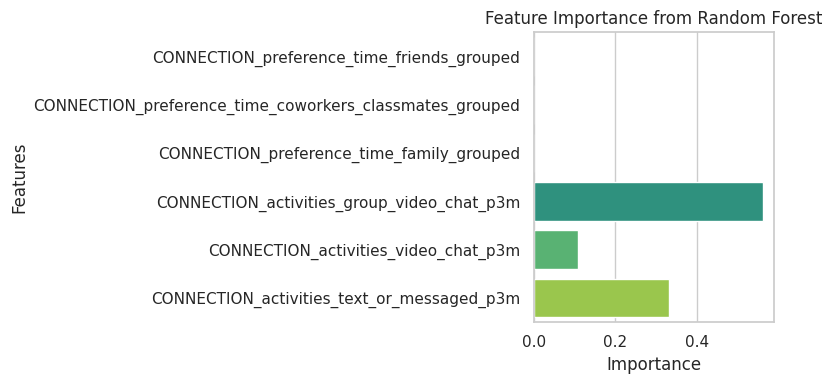


Feature Importance Values:
CONNECTION_preference_time_friends_grouped: 0.0000
CONNECTION_preference_time_coworkers_classmates_grouped: 0.0000
CONNECTION_preference_time_family_grouped: 0.0000
CONNECTION_activities_group_video_chat_p3m: 0.5602
CONNECTION_activities_video_chat_p3m: 0.1074
CONNECTION_activities_text_or_messaged_p3m: 0.3324


In [ ]:
# Import required libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define predictors and target
predictors = [
    'CONNECTION_preference_time_friends_grouped',
    'CONNECTION_preference_time_coworkers_classmates_grouped',
    'CONNECTION_preference_time_family_grouped',
    'CONNECTION_activities_group_video_chat_p3m',
    'CONNECTION_activities_video_chat_p3m',
    'CONNECTION_activities_text_or_messaged_p3m'
]
X = combined_cleaned_data[predictors]
y = combined_cleaned_data['WELLNESS_self_rated_mental_health']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=1000)
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Extract feature importance
feature_importances = rf_regressor.feature_importances_

# Plot feature importance
plt.figure(figsize=(8,4))
sns.barplot(x=feature_importances, y=predictors, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Print feature importance values
print("\nFeature Importance Values:")
for feature, importance in zip(predictors, feature_importances):
    print(f"{feature}: {importance:.4f}")
